In [6]:
!pip install lifetimes

import pandas as pd
import numpy as np
import datetime as dt
import lifetimes
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 500)


In [7]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df = df.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
import pandas as pd

# Assuming your DataFrame is named df
selected_attributes = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
# Add a new column to store the most frequent attribute for each row
df['most_frequent_attribute'] = df[selected_attributes].idxmax(axis=1)

# Apply a 10% discount to the most frequent attribute
df['discounted_attribute'] = df.apply(lambda row: row[row['most_frequent_attribute']] * 0.9, axis=1)

# Display the top 5 rows with 'ID', 'most_frequent_attribute', and 'discounted_attribute' columns
result_df = df[['ID', 'most_frequent_attribute', 'discounted_attribute']].head()
print(result_df)


     ID most_frequent_attribute  discounted_attribute
0  5524                MntWines                571.50
1  2174                MntWines                  9.90
2  4141                MntWines                383.40
3  6182         MntMeatProducts                 18.00
4  5324                MntWines                155.70


In [9]:
def check_df(dataframe, head=2):
    print('\033[1m' + '############ Shape ############' + '\033[0m')
    print(dataframe.shape)
    print('\033[1m' + '############ Types ############' + '\033[0m')
    print(dataframe.dtypes)
    print('\033[1m' + '############ Unique Values ############' + '\033[0m')
    print(dataframe.nunique())
    print('\033[1m' + '############ NA ############' + '\033[0m')
    print(dataframe.isnull().sum())
    print('\033[1m' + '############ Quantiles ############' + '\033[0m')
    print(dataframe.describe([0, 0.25, 0.50, 0.75, 0.99, 1]).T)

check_df(df)

############ Shape ############
(2240, 31)
############ Types ############
ID                           int64
Year_Birth                   int64
Education                   object
Marital_Status              object
Income                     float64
Kidhome                      int64
Teenhome                     int64
Dt_Customer                 object
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
AcceptedCmp3                 int64
AcceptedCmp4                 int64
AcceptedCmp5                 int64
AcceptedCmp1                 int64
AcceptedCmp2                 int64
Complain                     int64
Z_CostContact  

In [10]:
print(df.columns)


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'most_frequent_attribute',
       'discounted_attribute'],
      dtype='object')


In [11]:
# Calculate the median of the 'tIncome' column
median_income = df['Income'].median()

# Replace missing values in the 'Income' column with the calculated median
df['Income'].fillna(median_income, inplace=True)



In [12]:
def check_df(dataframe, head=2):
    print('\033[1m' + '############ NA ############' + '\033[0m')
    print(dataframe.isnull().sum())
check_df(df)

############ NA ############
ID                         0
Year_Birth                 0
Education                  0
Marital_Status             0
Income                     0
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
most_frequent_attribute    0
discounted_attribute       0
dtype: int64


In [14]:
# outlier_thresholds and replace_with_thresholds functions are defined to suppress outliers.

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = round(low_limit, 0)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = round(up_limit, 0)

In [15]:
columns = ["MntWines", "MntFruits", "MntMeatProducts","MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases",
           "NumCatalogPurchases", "NumStorePurchases", "Income"]

for col in columns:
    replace_with_thresholds(df, col)

In [16]:
df["customer_value_total"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

df["order_num_total"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

df = df[["ID", "Year_Birth", "Education", "Marital_Status", "Income", "Kidhome", "Teenhome", "Dt_Customer", "Recency", "customer_value_total", "order_num_total"]] # Drop the combined values from the dataset.

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,customer_value_total,order_num_total
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,1617,25
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,27,6
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,776,21
3,6182,1984,Graduation,Together,26646.00,1,0,10-02-2014,26,53,8
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,422,19


In [19]:
df = df[(df['order_num_total'] > 1) & (df['customer_value_total'] > 1)] # Filtering order_num_total and customer_value_total are greater than 1.

In [20]:
# Calculating RFM Metrics

rfm = pd.DataFrame()
rfm["customer_id"] = df["ID"]
rfm["recency"] = df["Recency"]
rfm["frequency"] = df["order_num_total"]
rfm["monetary"] = df["customer_value_total"]

rfm.head()

,customer_id,recency,frequency,monetary
0,5524,58,25,1617
1,2174,38,6,27
2,4141,26,21,776
3,6182,26,8,53
4,5324,94,19,422


In [21]:
# recency_score, frequency_score, monetary_score

rfm["recency_score"] = pd.qcut(rfm['recency'].rank(method="first"), 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['monetary'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# RF_SCORE

rfm["RF_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))

rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
0,5524,58,25,1617,3,5,5,35
1,2174,38,6,27,4,1,1,41
2,4141,26,21,776,4,4,4,44
3,6182,26,8,53,4,2,1,42
4,5324,94,19,422,1,4,3,14


In [22]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
0,5524,58,25,1617,3,5,5,35,loyal_customers
1,2174,38,6,27,4,1,1,41,promising
2,4141,26,21,776,4,4,4,44,loyal_customers
3,6182,26,8,53,4,2,1,42,potential_loyalists
4,5324,94,19,422,1,4,3,14,at_Risk


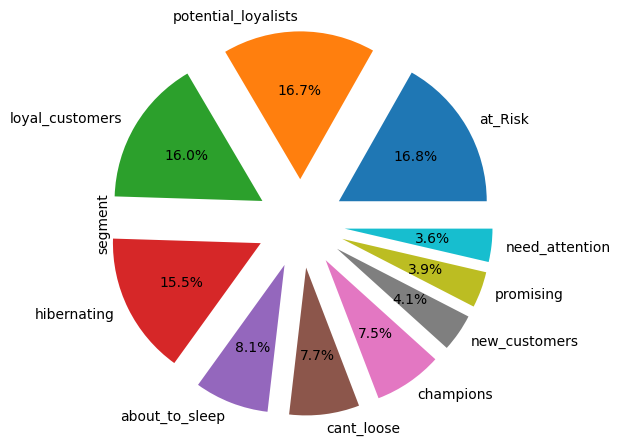

In [23]:
# Visualized to see percentages of segments

rfm["segment"].value_counts().plot.pie(subplots=True, autopct='%1.1f%%', explode=[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3])
plt.show()


In [24]:
df_c = df # Saving df as df_c to restore if data gets corrupted during operations.
df_c["Dt_Customer"] = df_c["Dt_Customer"].apply(pd.to_datetime) # Converting date variable's datatype to datetime.

# Recency: The age of the customer when he made its last purchase (Last customer purchase date - first customer purchase date)
# T: Customer's age. (how long before the analysis date the first purchase was made)
# Frequency: The number of repeated purchases the customer made after his first date of first purchase
# Average Monetary: The average amount spent by a customer

cltv_df = pd.DataFrame()
cltv_df["customer_id"] = df_c["ID"]
cltv_df["recency_cltv_weekly"] = df_c["Recency"] /7  # Expression of recency and T for BGNBD in weekly terms
cltv_df["T_weekly"] = ((df['Dt_Customer'].max() - df['Dt_Customer']).dt.days / 7 ) + 20
cltv_df["frequency"] = df_c["order_num_total"]
cltv_df["monetary_cltv_avg"] = df_c["customer_value_total"] / df_c["order_num_total"] # Expressing monetary value as average earnings per purchase

cltv_df.head()

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg
0,5524,8.29,158.71,25,64.68
1,2174,5.43,37.86,6,4.50
2,4141,3.71,87.43,21,36.95
3,6182,3.71,29.29,8,6.62
4,5324,13.43,65.86,19,22.21


In [25]:
# 1. Preparation of the BGNBD model

bgf = BetaGeoFitter(penalizer_coef=0.0001)
bgf.fit(cltv_df['frequency'],
        cltv_df['recency_cltv_weekly'],
        cltv_df['T_weekly'])

# Estimate expected purchases from customers in 3 months and add exp_sales_3_month to cltv dataframe.

cltv_df["exp_sales_3_month"] = bgf.predict(4*3,
                                       cltv_df['frequency'],
                                       cltv_df['recency_cltv_weekly'],
                                       cltv_df['T_weekly'])

# Estimate expected purchases from customers in 6 months and add exp_sales_6_month to cltv dataframe.

cltv_df["exp_sales_6_month"] = bgf.predict(4*6,
                                           cltv_df['frequency'],
                                       cltv_df['recency_cltv_weekly'],
                                       cltv_df['T_weekly'])

# 2.  Fit the Gamma-Gamma model. Estimate the average value of the customers and add it to the cltv dataframe as exp_average_value.

ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv_df['frequency'], cltv_df['monetary_cltv_avg'])
cltv_df["exp_average_value"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                cltv_df['monetary_cltv_avg'])
cltv_df.head()

# 3. Calculate 6 months CLTV and add it to the dataframe with the name cltv.

cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency_cltv_weekly'],
                                   cltv_df['T_weekly'],
                                   cltv_df['monetary_cltv_avg'],
                                   time=6,
                                   freq="W",
                                   discount_rate=0.01)
cltv_df["cltv"] = cltv